In [2]:
# import pandas
import pandas as pd

In [54]:
# load CSV data and declare row 0 and row 1 as header (multi index)
# https://pandas.pydata.org/docs/user_guide/advanced.html

df = pd.read_csv('D:\\Minda\\School\\University\\3 rd Year (2022-\\4 - Fall 2023 Semester\\MGTC28H3 - LEC 01\\Group Project - Nov 28\\data\\raw\\Factory POS $ - UTSC Lecture.csv', header=[0,1])

In [55]:
df

Unnamed: 0_level_0 Unnamed: 1_level_0 Fiscal Year                      
            Need State        Fiscal Week        2021       2022       2023
0         Need State 1                  1   317435.25  348637.50  372921.75
1         Need State 1                  2   309234.75  343799.25  357329.25
2         Need State 1                  3   331149.00  346592.25  352571.25
3         Need State 1                  4   291885.00  344795.25  331310.25
4         Need State 1                  5   308238.00  338146.50  383741.25
..                 ...                ...         ...        ...        ...
307       Need State 6                 48   482283.00  585123.75       0.00
308       Need State 6                 49   411926.25  540969.00       0.00
309       Need State 6                 50   428814.75  584413.50       0.00
310       Need State 6                 51   470064.75  581396.25       0.00
311       Need State 6                 52   373771.50  552392.25       0.00

[312 rows x 5 columns]

In [56]:
df.columns

MultiIndex([('Unnamed: 0_level_0',  'Need State'),
            ('Unnamed: 1_level_0', 'Fiscal Week'),
            (       'Fiscal Year',        '2021'),
            (       'Fiscal Year',        '2022'),
            (       'Fiscal Year',        '2023')],
           )

In [57]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html
df = df.melt(id_vars=[('Unnamed: 0_level_0', 'Need State'), ('Unnamed: 1_level_0', 'Fiscal Week')], value_vars=[('Fiscal Year', '2021'), ('Fiscal Year', '2022'), ('Fiscal Year', '2023')])

In [58]:
df

,"(Unnamed: 0_level_0, Need State)","(Unnamed: 1_level_0, Fiscal Week)",variable_0,variable_1,value
0,Need State 1,1,Fiscal Year,2021,317435.25
1,Need State 1,2,Fiscal Year,2021,309234.75
2,Need State 1,3,Fiscal Year,2021,331149.00
3,Need State 1,4,Fiscal Year,2021,291885.00
4,Need State 1,5,Fiscal Year,2021,308238.00
...,...,...,...,...,...
931,Need State 6,48,Fiscal Year,2023,0.00
932,Need State 6,49,Fiscal Year,2023,0.00
933,Need State 6,50,Fiscal Year,2023,0.00
934,Need State 6,51,Fiscal Year,2023,0.00


In [59]:
# rename the columns
df = df.rename(columns={df.columns[0]: "Need States", df.columns[1]: "Week", df.columns[3]: "Year", df.columns[4]: "Factory POS"})

In [60]:
df

,Need States,Week,variable_0,Year,Factory POS
0,Need State 1,1,Fiscal Year,2021,317435.25
1,Need State 1,2,Fiscal Year,2021,309234.75
2,Need State 1,3,Fiscal Year,2021,331149.00
3,Need State 1,4,Fiscal Year,2021,291885.00
4,Need State 1,5,Fiscal Year,2021,308238.00
...,...,...,...,...,...
931,Need State 6,48,Fiscal Year,2023,0.00
932,Need State 6,49,Fiscal Year,2023,0.00
933,Need State 6,50,Fiscal Year,2023,0.00
934,Need State 6,51,Fiscal Year,2023,0.00


In [61]:
# remove extra column
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pop.html
df.pop('variable_0')

0      Fiscal Year
1      Fiscal Year
2      Fiscal Year
3      Fiscal Year
4      Fiscal Year
          ...     
931    Fiscal Year
932    Fiscal Year
933    Fiscal Year
934    Fiscal Year
935    Fiscal Year
Name: variable_0, Length: 936, dtype: object

In [62]:
df

,Need States,Week,Year,Factory POS
0,Need State 1,1,2021,317435.25
1,Need State 1,2,2021,309234.75
2,Need State 1,3,2021,331149.00
3,Need State 1,4,2021,291885.00
4,Need State 1,5,2021,308238.00
...,...,...,...,...
931,Need State 6,48,2023,0.00
932,Need State 6,49,2023,0.00
933,Need State 6,50,2023,0.00
934,Need State 6,51,2023,0.00


In [63]:
# convert week# to an actual date for easy plotting
df['Date'] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Week"].astype(str) + "-1", format='%Y-%U-%w')

In [64]:
df

,Need States,Week,Year,Factory POS,Date
0,Need State 1,1,2021,317435.25,2021-01-04
1,Need State 1,2,2021,309234.75,2021-01-11
2,Need State 1,3,2021,331149.00,2021-01-18
3,Need State 1,4,2021,291885.00,2021-01-25
4,Need State 1,5,2021,308238.00,2021-02-01
...,...,...,...,...,...
931,Need State 6,48,2023,0.00,2023-11-27
932,Need State 6,49,2023,0.00,2023-12-04
933,Need State 6,50,2023,0.00,2023-12-11
934,Need State 6,51,2023,0.00,2023-12-18


In [65]:
import seaborn as sns

D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

<Axes: xlabel='Date', ylabel='Factory POS'>

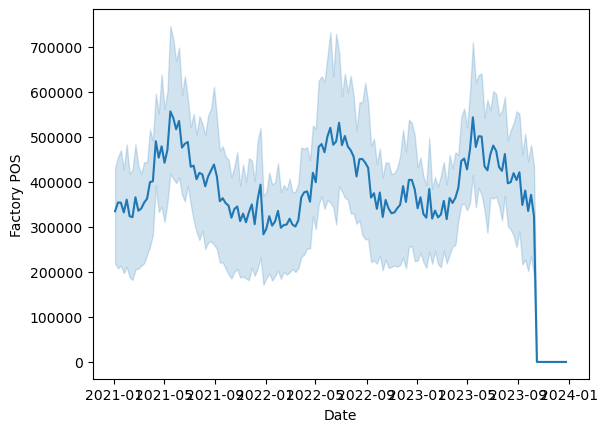

In [66]:
# try a couple graphs
sns.lineplot(data = df, x=df.Date, y='Factory POS')

D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\A

<Axes: xlabel='Week', ylabel='Factory POS'>

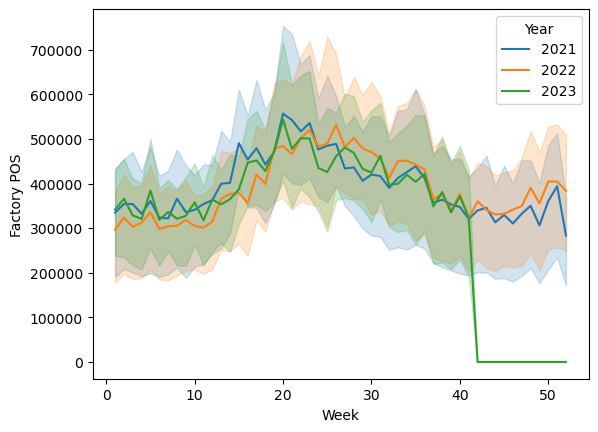

In [67]:
sns.lineplot(data = df, x='Week', y='Factory POS', hue='Year')

## Additional:

In [68]:
# rearrange columns
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html
# https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
df = df.reindex(columns=['Year','Week','Date','Need States','Factory POS'])

In [69]:
df

,Year,Week,Date,Need States,Factory POS
0,2021,1,2021-01-04,Need State 1,317435.25
1,2021,2,2021-01-11,Need State 1,309234.75
2,2021,3,2021-01-18,Need State 1,331149.00
3,2021,4,2021-01-25,Need State 1,291885.00
4,2021,5,2021-02-01,Need State 1,308238.00
...,...,...,...,...,...
931,2023,48,2023-11-27,Need State 6,0.00
932,2023,49,2023-12-04,Need State 6,0.00
933,2023,50,2023-12-11,Need State 6,0.00
934,2023,51,2023-12-18,Need State 6,0.00


In [70]:
# sort values so format matches other cleaned csv files
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
df = df.sort_values(by=['Year', 'Week'])

In [71]:
df

,Year,Week,Date,Need States,Factory POS
0,2021,1,2021-01-04,Need State 1,317435.25
52,2021,1,2021-01-04,Need State 2,410931.00
104,2021,1,2021-01-04,Need State 3,355992.75
156,2021,1,2021-01-04,Need State 4,451255.50
208,2021,1,2021-01-04,Need State 5,15795.00
...,...,...,...,...,...
727,2023,52,2023-12-25,Need State 2,0.00
779,2023,52,2023-12-25,Need State 3,0.00
831,2023,52,2023-12-25,Need State 4,0.00
883,2023,52,2023-12-25,Need State 5,0.00


In [72]:
# reset index numbers
df = df.reset_index(drop=True)

In [73]:
df

,Year,Week,Date,Need States,Factory POS
0,2021,1,2021-01-04,Need State 1,317435.25
1,2021,1,2021-01-04,Need State 2,410931.00
2,2021,1,2021-01-04,Need State 3,355992.75
3,2021,1,2021-01-04,Need State 4,451255.50
4,2021,1,2021-01-04,Need State 5,15795.00
...,...,...,...,...,...
931,2023,52,2023-12-25,Need State 2,0.00
932,2023,52,2023-12-25,Need State 3,0.00
933,2023,52,2023-12-25,Need State 4,0.00
934,2023,52,2023-12-25,Need State 5,0.00


In [74]:
# replace instances of 0 with NaN
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
# https://stackoverflow.com/questions/34794067/how-to-set-a-cell-to-nan-in-a-pandas-dataframe
df = df.replace(to_replace=0, value=pd.NA)

In [75]:
df

,Year,Week,Date,Need States,Factory POS
0,2021,1,2021-01-04,Need State 1,317435.25
1,2021,1,2021-01-04,Need State 2,410931.0
2,2021,1,2021-01-04,Need State 3,355992.75
3,2021,1,2021-01-04,Need State 4,451255.5
4,2021,1,2021-01-04,Need State 5,15795.0
...,...,...,...,...,...
931,2023,52,2023-12-25,Need State 2,NaN
932,2023,52,2023-12-25,Need State 3,NaN
933,2023,52,2023-12-25,Need State 4,NaN
934,2023,52,2023-12-25,Need State 5,NaN


In [76]:
# remove rows that contain NaN
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df = df.dropna(axis=0)

In [77]:
df

,Year,Week,Date,Need States,Factory POS
0,2021,1,2021-01-04,Need State 1,317435.25
1,2021,1,2021-01-04,Need State 2,410931.0
2,2021,1,2021-01-04,Need State 3,355992.75
3,2021,1,2021-01-04,Need State 4,451255.5
4,2021,1,2021-01-04,Need State 5,15795.0
...,...,...,...,...,...
865,2023,41,2023-10-09,Need State 2,351225.75
866,2023,41,2023-10-09,Need State 3,271016.25
867,2023,41,2023-10-09,Need State 4,418831.5
868,2023,41,2023-10-09,Need State 5,36111.0


D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

<Axes: xlabel='Date', ylabel='Factory POS'>

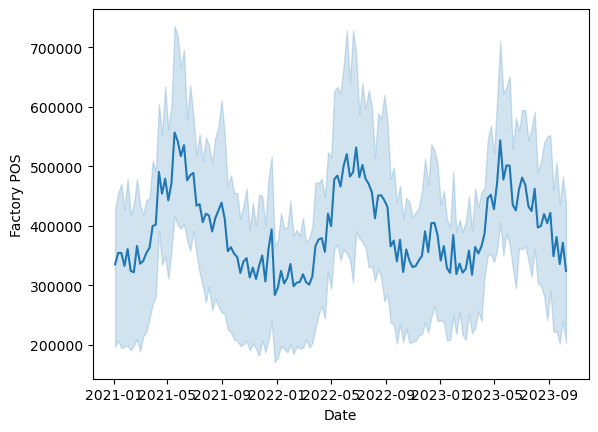

In [78]:
# check how the graphs look now
sns.lineplot(data = df, x=df.Date, y='Factory POS')

D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Apps\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\A

<Axes: xlabel='Week', ylabel='Factory POS'>

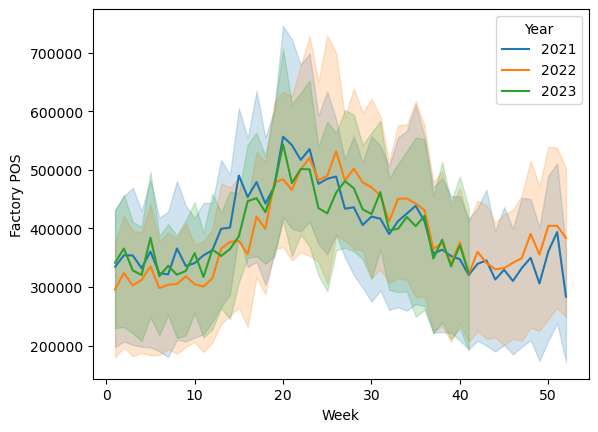

In [79]:
sns.lineplot(data = df, x='Week', y='Factory POS', hue='Year')

In [80]:
# write the dataframe to a csv file
df.to_csv('D:\\Minda\\School\\University\\3 rd Year (2022-\\4 - Fall 2023 Semester\\MGTC28H3 - LEC 01\\Group Project - Nov 28\\data\\clean\\Factory POS $.csv')